# Hierarchical clustering of PSSM

In [1]:
from katlas.data import *
import pandas as pd
from katlas.clustering import *

In [2]:
df = pd.read_parquet('out/CDDM_pssms.parquet')

In [3]:
df

,-20P,-20G,-20A,-20C,-20S,-20T,-20V,-20I,-20L,-20M,...,20H,20K,20R,20Q,20N,20D,20E,20pS,20pT,20pY
index,,,,,,,,,,,,,,,,,,,,,
P12931_SRC,0.054538,0.081380,0.060077,0.012356,0.036216,0.032382,0.055816,0.052407,0.083511,0.023434,...,0.013351,0.076992,0.060970,0.037383,0.036938,0.052960,0.086337,0.025367,0.015576,0.023142
P29320_EPHA3,0.044276,0.088013,0.065335,0.008639,0.037797,0.036717,0.072354,0.048596,0.075594,0.026998,...,0.014132,0.083098,0.059356,0.031091,0.033917,0.056529,0.100622,0.025438,0.013567,0.015828
P07332_FES,0.047231,0.082519,0.070575,0.011401,0.034745,0.039088,0.061889,0.053203,0.088491,0.026059,...,0.013053,0.086266,0.055619,0.040863,0.038025,0.059024,0.085698,0.026674,0.013621,0.019296
Q16288_NTRK3,0.044444,0.074644,0.074074,0.017094,0.033048,0.035328,0.060969,0.058120,0.084330,0.026781,...,0.015682,0.091677,0.052473,0.030760,0.044029,0.057298,0.088661,0.021713,0.015682,0.018094
Q9UM73_ALK,0.045748,0.079765,0.073314,0.018182,0.032845,0.035191,0.067449,0.051026,0.076246,0.027566,...,0.015634,0.090198,0.069152,0.030066,0.043897,0.051112,0.096212,0.026458,0.013229,0.017438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q15746_SMMLCK,0.078947,0.052632,0.078947,0.026316,0.052632,0.026316,0.052632,0.052632,0.052632,0.000000,...,0.000000,0.066667,0.022222,0.044444,0.133333,0.044444,0.000000,0.044444,0.022222,0.000000
Q01973_ROR1,0.097561,0.097561,0.024390,0.000000,0.024390,0.146341,0.170732,0.024390,0.048780,0.000000,...,0.000000,0.075000,0.050000,0.000000,0.050000,0.025000,0.125000,0.125000,0.000000,0.025000
P15056_BRAF,0.095238,0.071429,0.047619,0.000000,0.095238,0.047619,0.071429,0.000000,0.095238,0.047619,...,0.000000,0.075000,0.075000,0.025000,0.025000,0.075000,0.075000,0.050000,0.000000,0.000000


In [4]:
Z = get_Z(df)

  0%|          | 0/53956 [00:00<?, ?it/s]

In [5]:
data = Data.get_ks_dataset()

In [6]:
data['kinase_id'] = data['kinase_uniprot'] + '_' + data['kinase_protein'].str.split().str[0]
cnt = data['kinase_id'].value_counts()

In [7]:
labels= get_pssm_seq_labels(df,count_map=cnt,thr=0.2)

In [11]:
from katlas.plot import *

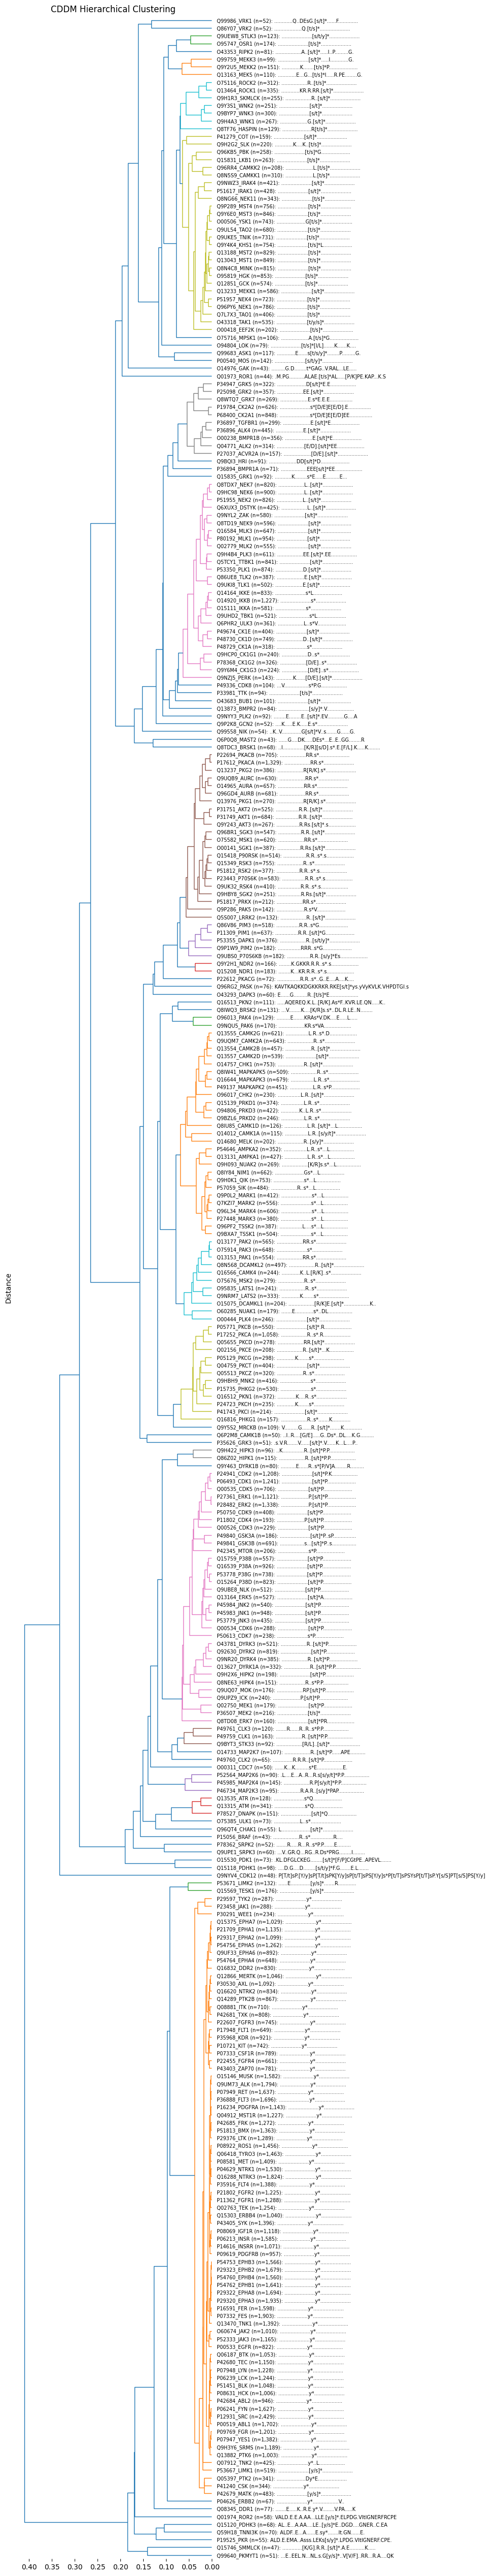

In [12]:
plot_dendrogram(Z,dense=5,labels=labels,title='CDDM Hierarchical Clustering') 
save_pdf('out/CDDM_hierarchical.pdf')

## PSPA

In [13]:
df2 = Data.get_pspa_all_scale()

In [16]:
info = Data.get_kinase_info()

In [30]:
kmap = info.set_index('kinase')['uniprot']

In [36]:
df2.index = df2.index.str.split('_').str[0].map(kmap) + "_" + df2.index

In [39]:
Z2 = get_Z(df2)

  0%|          | 0/78210 [00:00<?, ?it/s]

In [40]:
labels2= get_pssm_seq_labels(df2,thr=0.2)

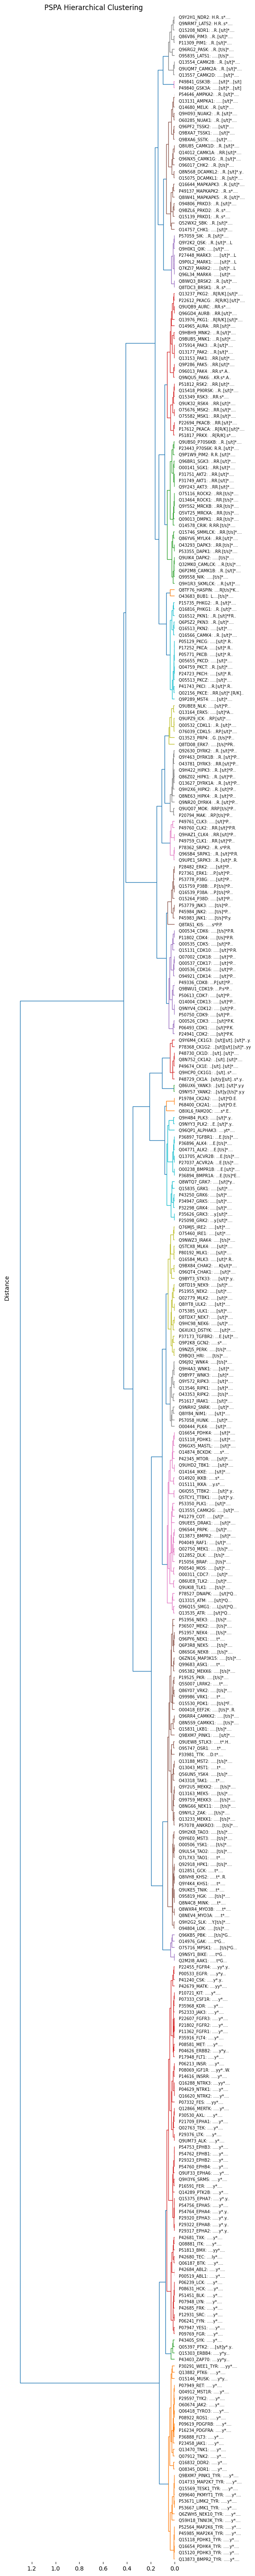

In [41]:
plot_dendrogram(Z2,dense=5,labels=labels2,title='PSPA Hierarchical Clustering') 
save_pdf('out/PSPA_hierarchical.pdf')